In [120]:
from pathlib import Path
root_dir = Path("/mnt/infonas/data/nlokesh/image_recourse")
import sys
sys.path.insert(0, str(root_dir))
sys.path.insert(0, str(root_dir / "our_method"))
import numpy as np
import pandas as pd

In [121]:
import pickle as pkl
rsij_dir = root_dir / "our_method/results/models/greedy_rec"
prefix = '<bound method ShapenetRecourseHelper._def_name of <our_method.recourse.ShapenetRecourseHelper object at 0x7fe01e3862e8>>riter'

In [122]:
import our_method.constants as constants
import utils.common_utils as cu
import utils.our_main_helper as main_helper

dh = main_helper.get_data_helper(dataset_name = constants.SHAPENET)

In [143]:
ideal_betas = dh._train._ideal_betas
Beta = dh._train._Beta
Siblings = dh._train._Siblings
y = dh._train._y

In [151]:
good_r_counts = []
total_r = []
r_beta_freq = {
    "beta": [],
    "cnt": [],
    "y": []
}

Total_runs = 26
for r_iter in (np.arange(1, Total_runs)*20)-1:
    with open(rsij_dir / f"{prefix}-{r_iter}-R-Sij.pkl", "rb") as file:
        rsij = pkl.load(file)
        
    R = rsij["R"]
    Sij = rsij["Sij"]
    
    total_r.append(len(R))
    good_r_counts.append(np.sum(ideal_betas[np.array(R)]))
    unq, cnt = np.unique(Beta[R], axis=0, return_counts=True)
    
    r_beta_freq["beta"].append(unq)
    r_beta_freq["cnt"].append(cnt)    
    r_beta_freq["y"].append(y[R])

In [124]:
pd.DataFrame({"ideal": good_r_counts, "total": total_r})

,ideal,total
0,0,20
1,3,40
2,5,60
3,8,80
4,10,100
5,16,120
6,21,140
7,25,160
8,31,180
9,35,200


In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams.update({'figure.figsize':(20,30), 'figure.dpi':100})

/mnt/infonas/data/nlokesh/Anaconda/anaconda3/envs/cs728/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


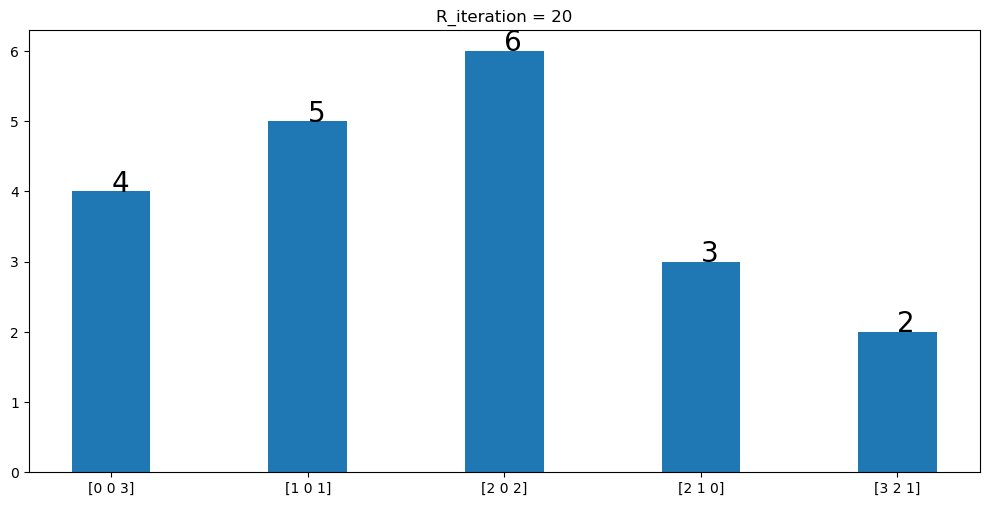

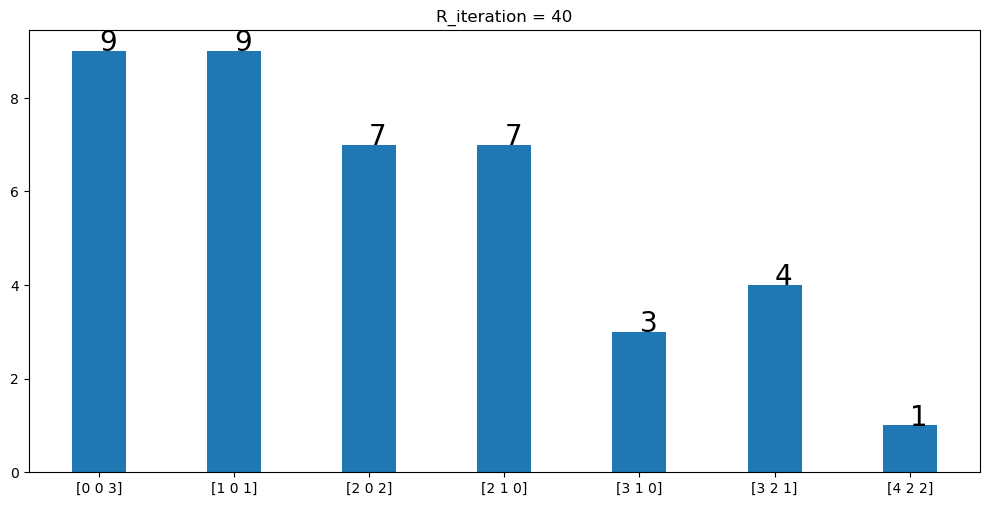

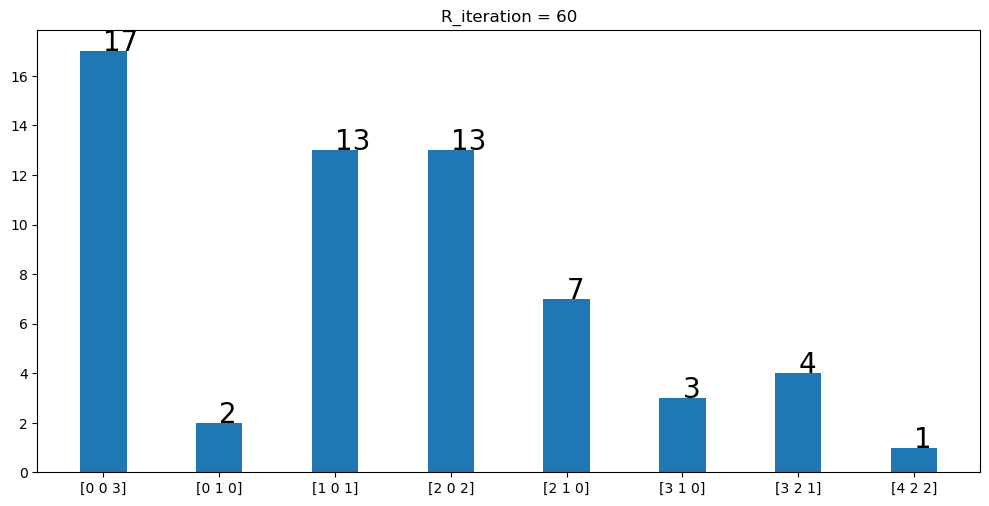

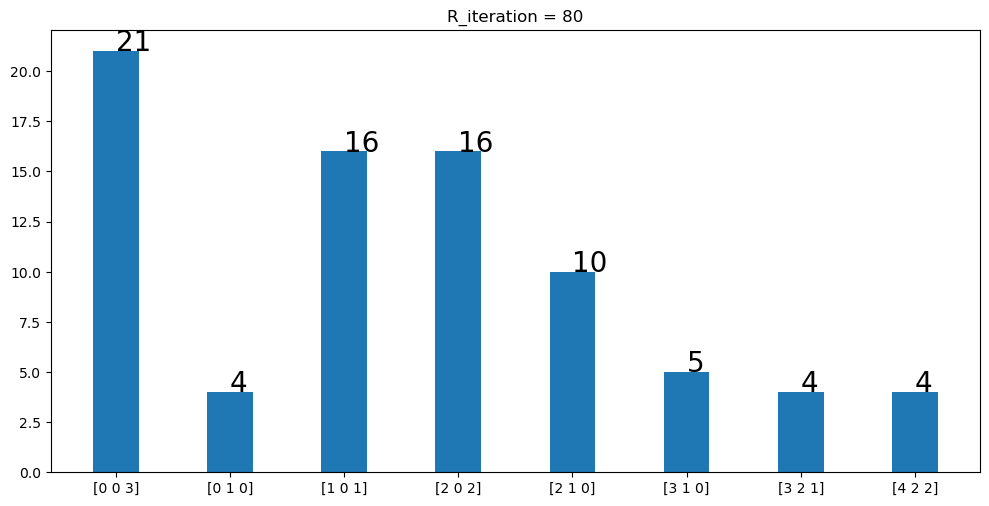

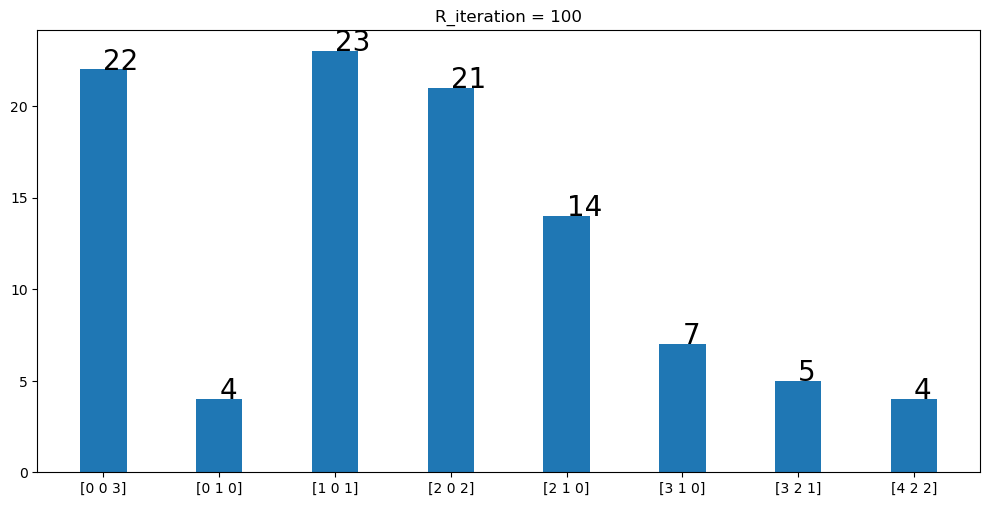

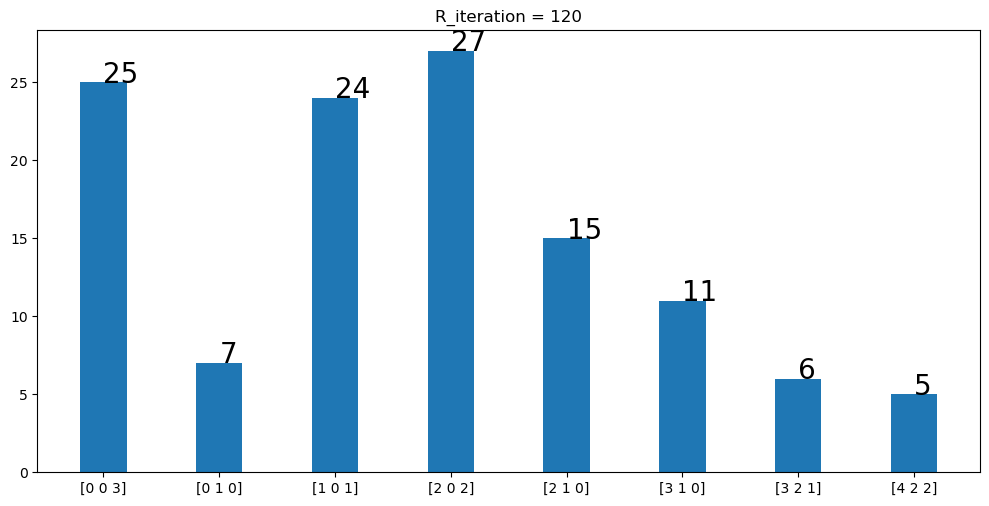

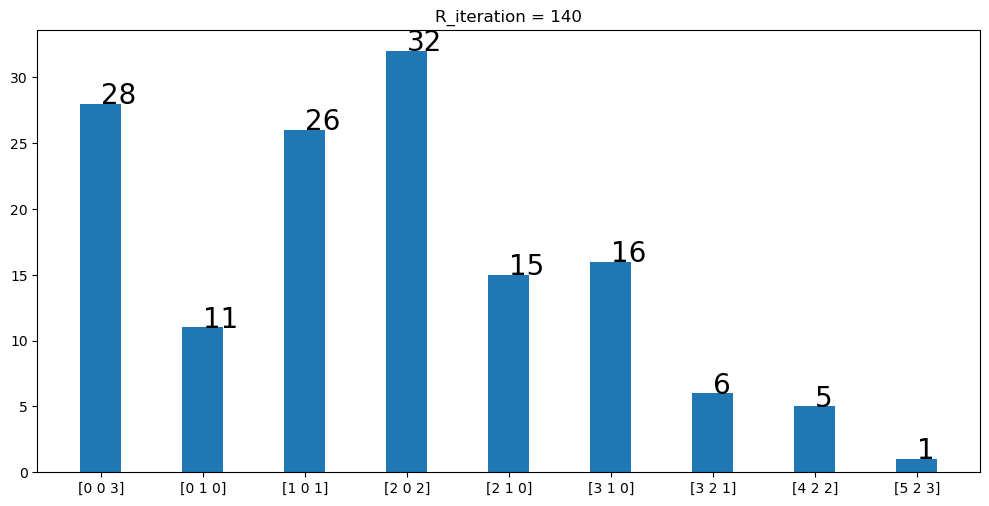

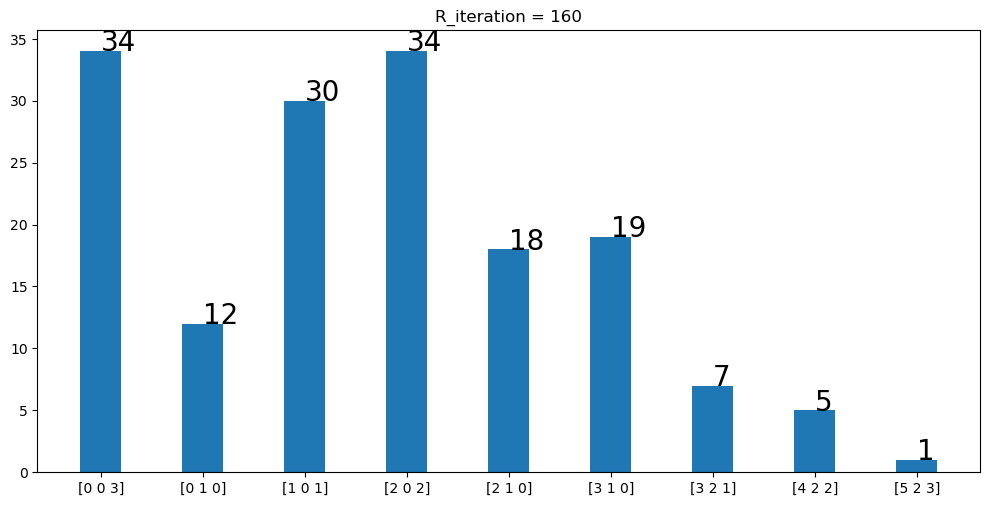

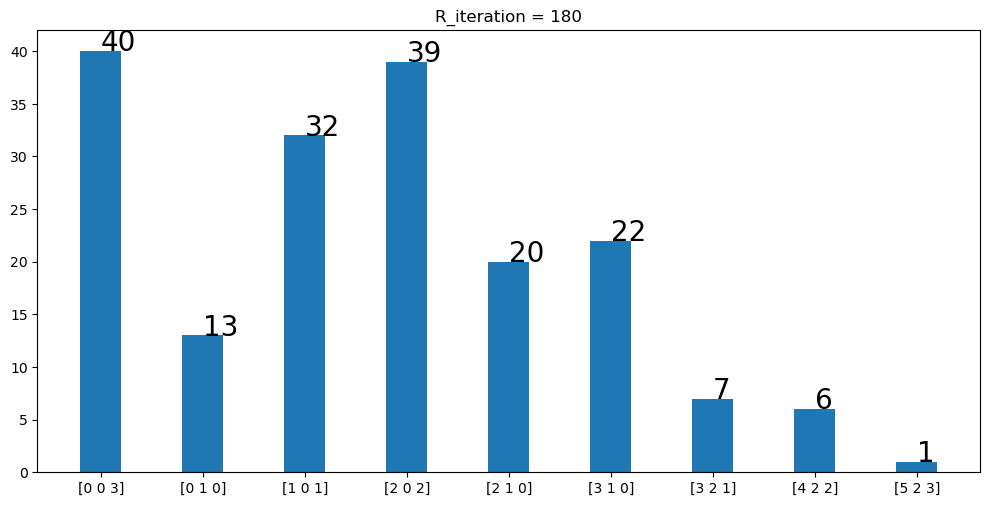

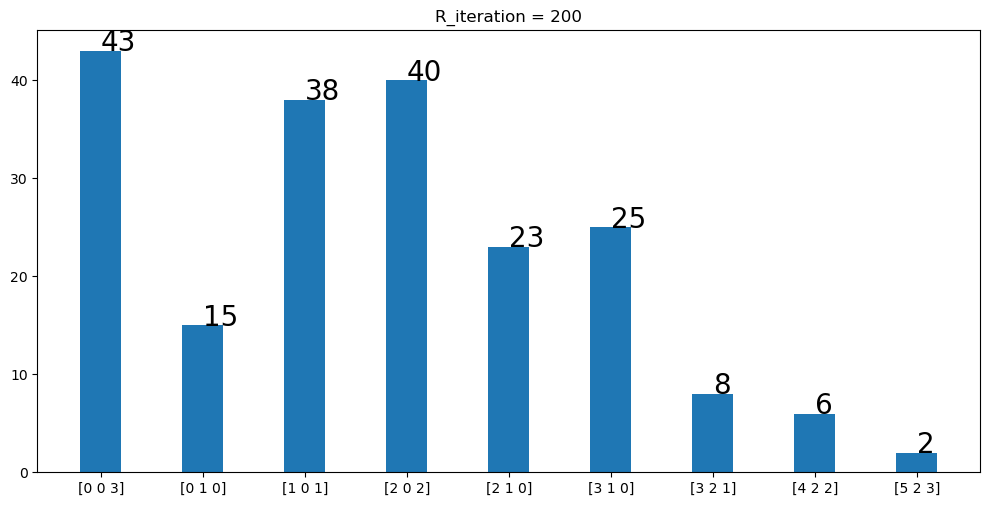

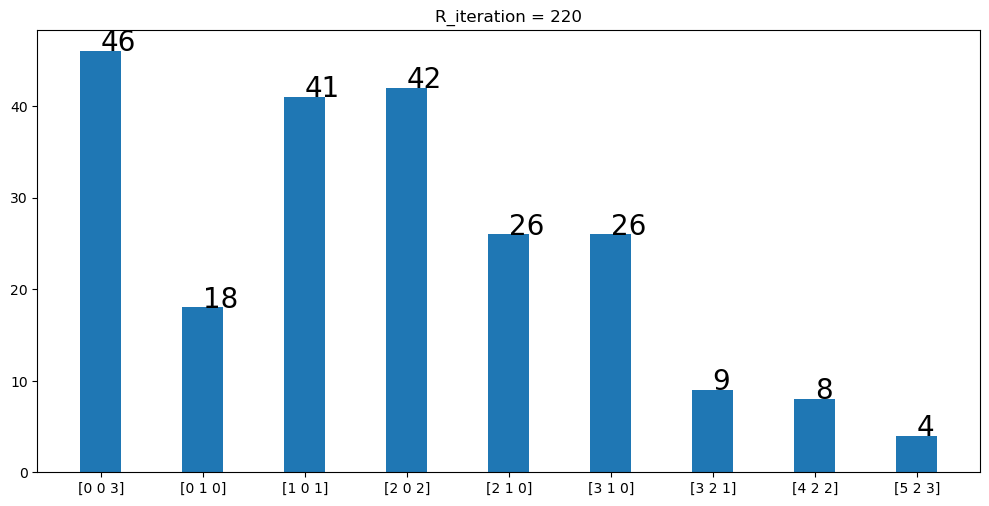

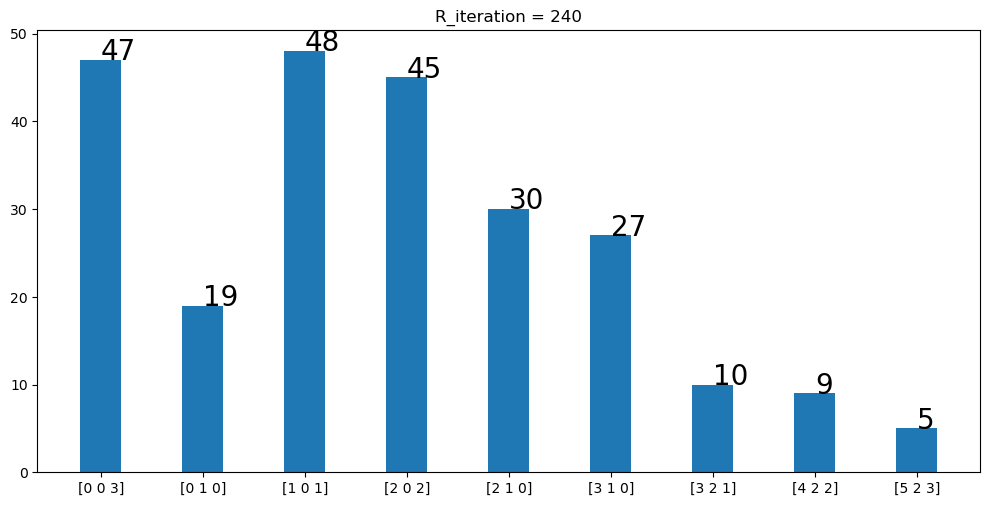

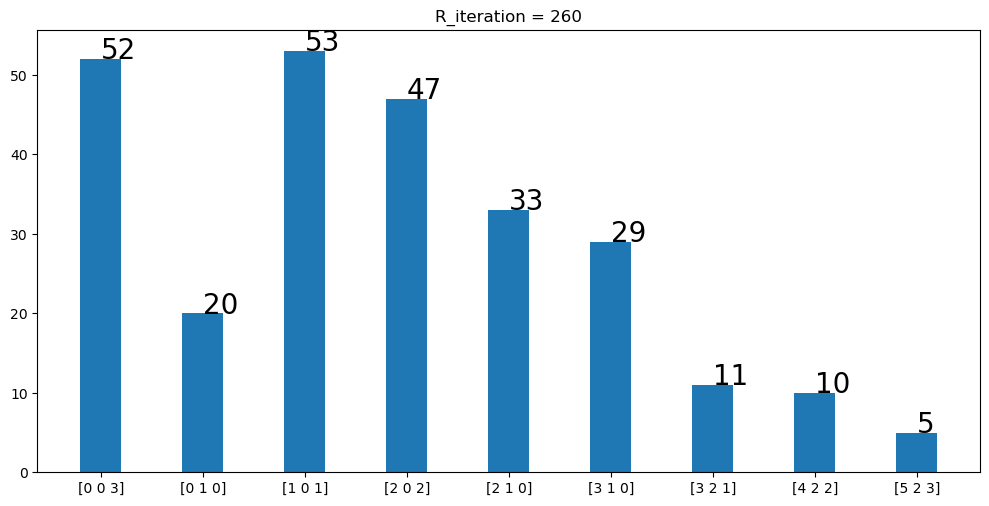

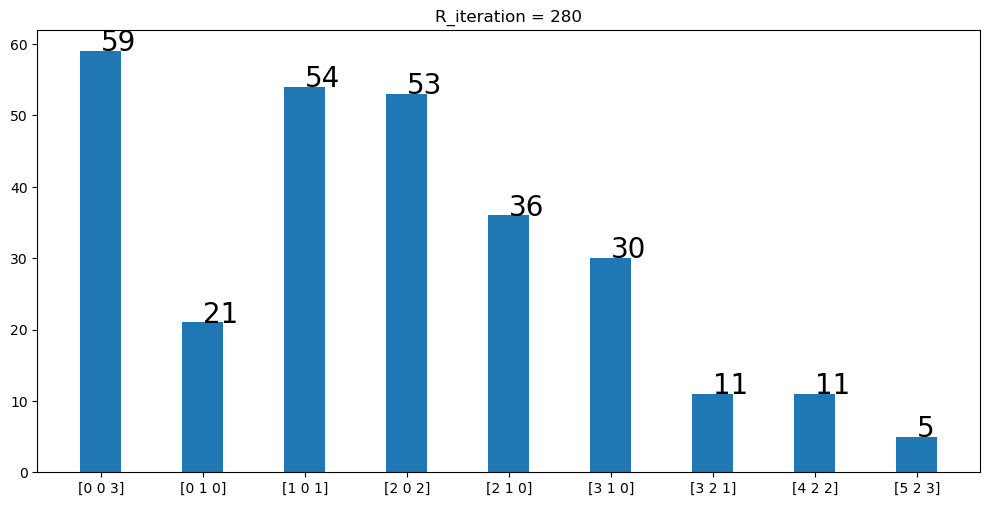

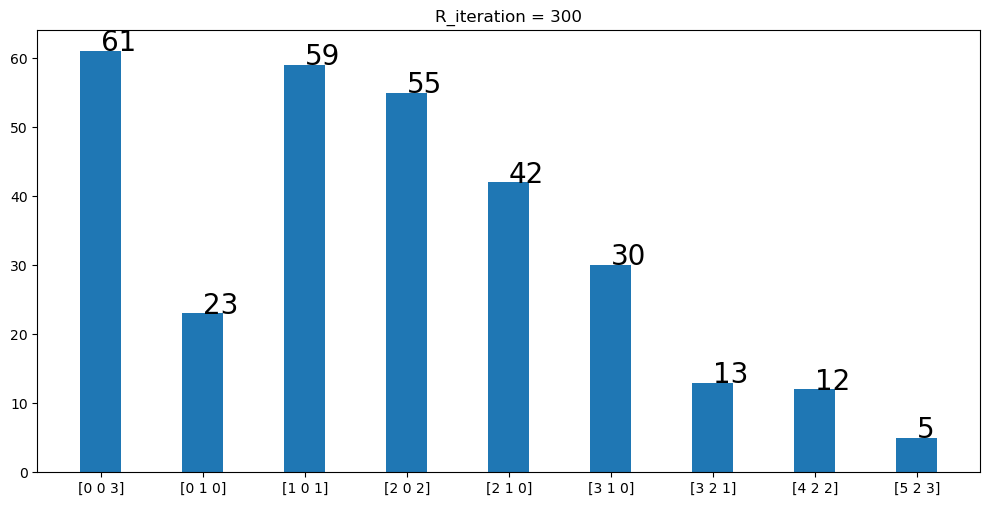

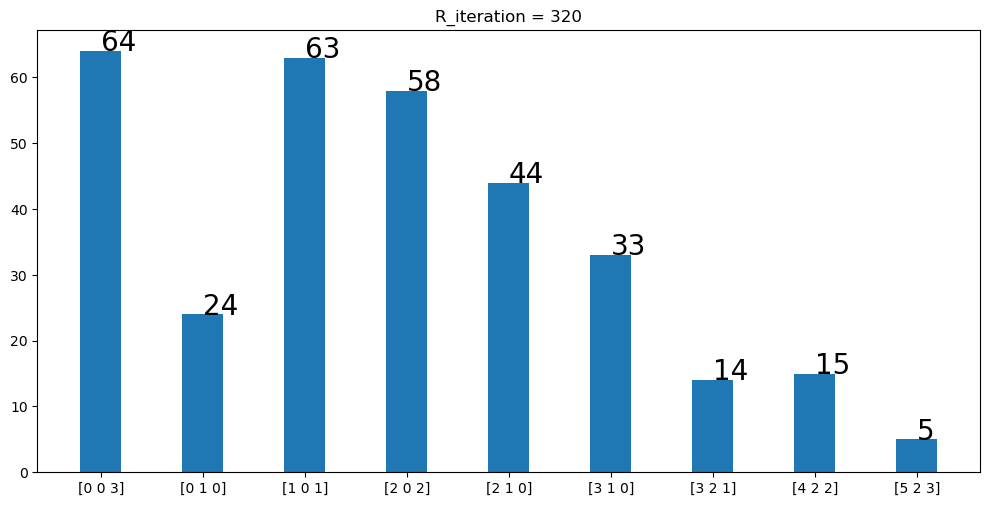

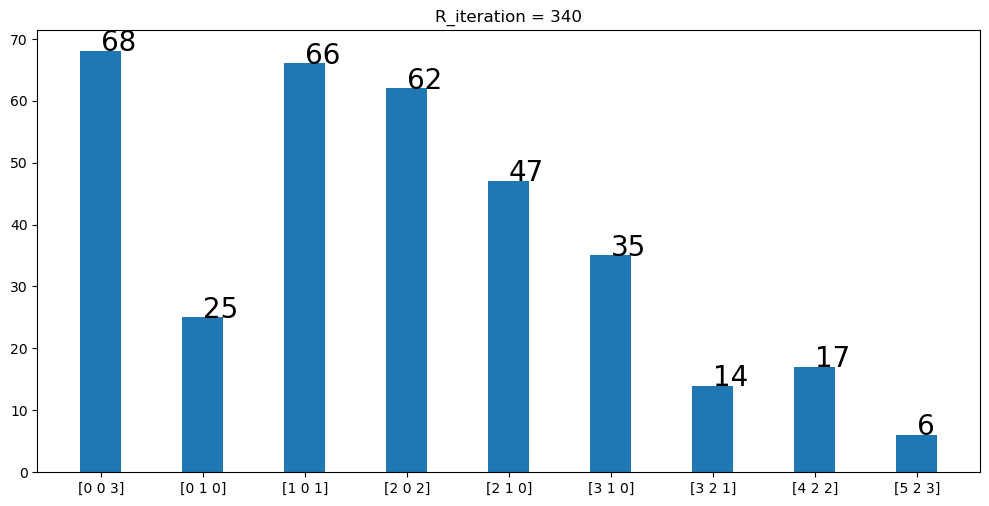

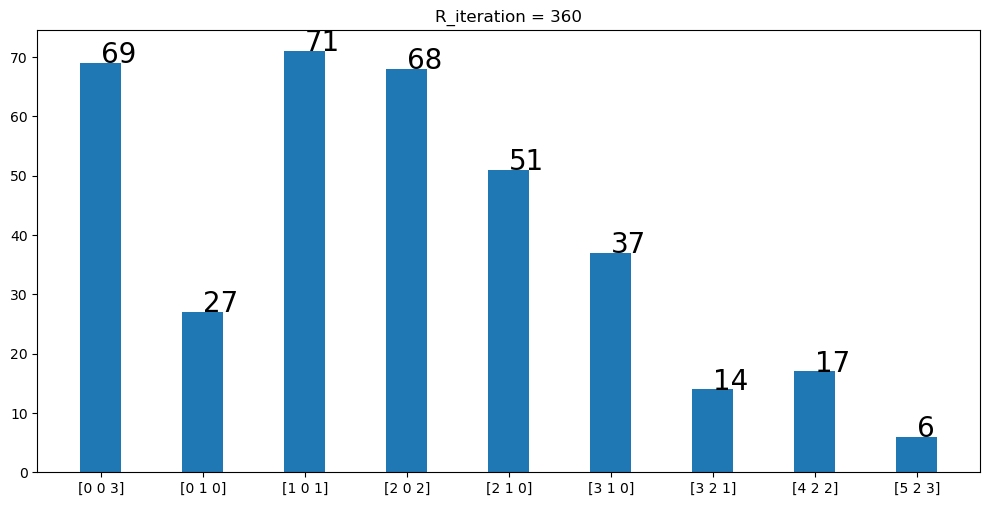

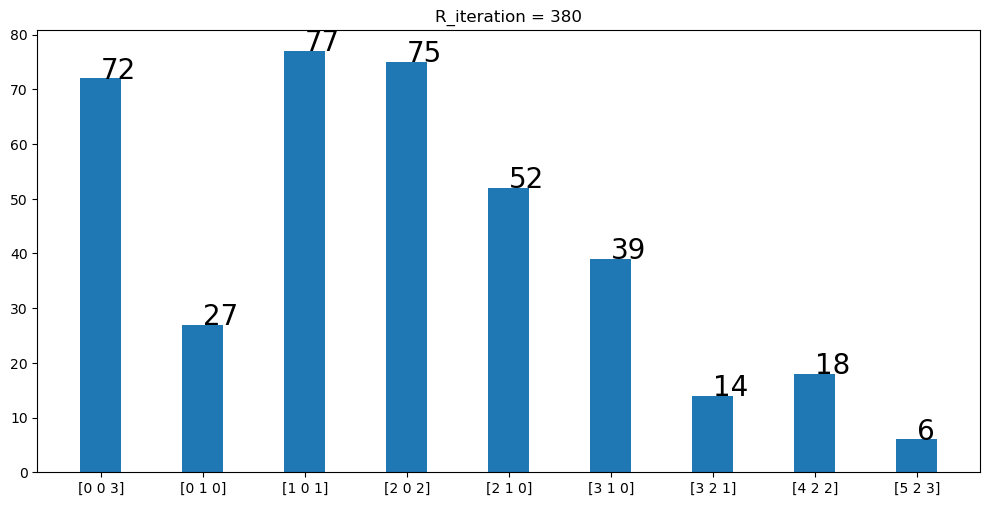

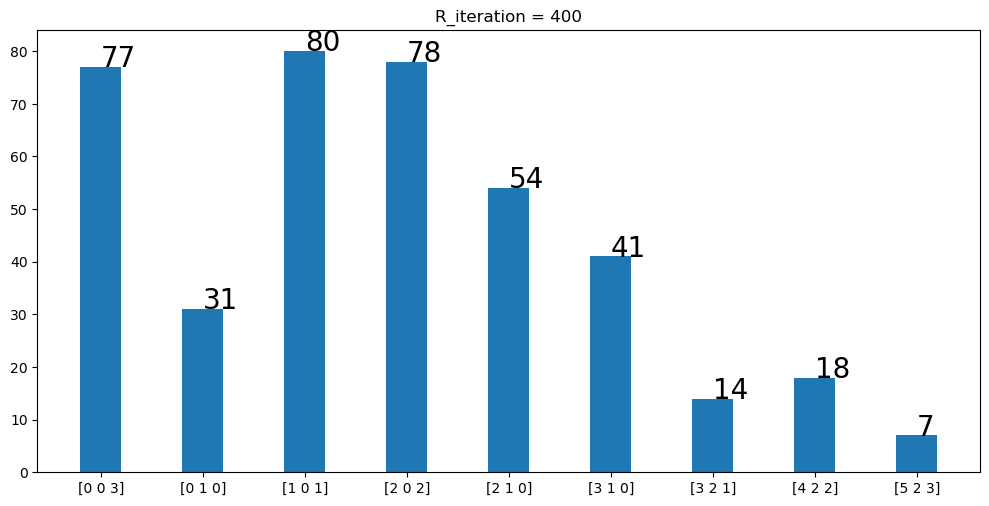

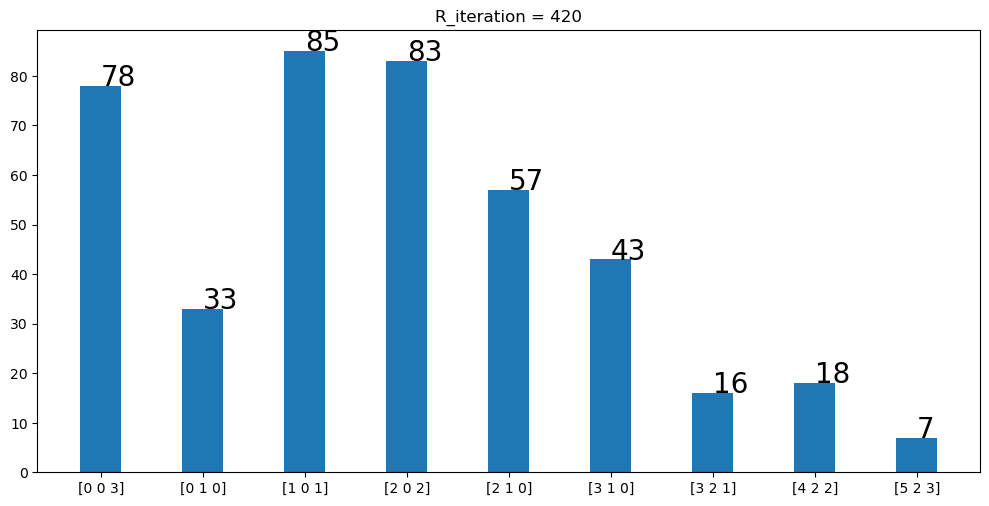

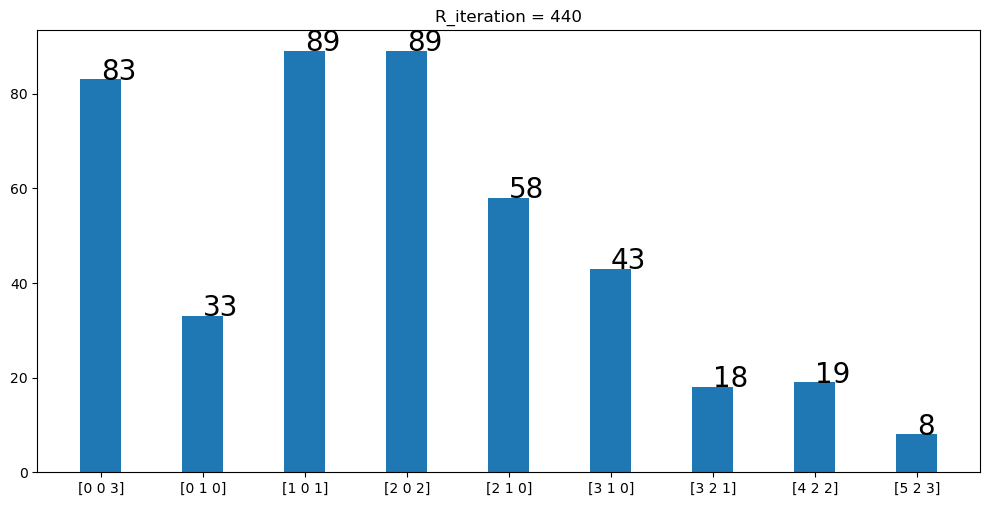

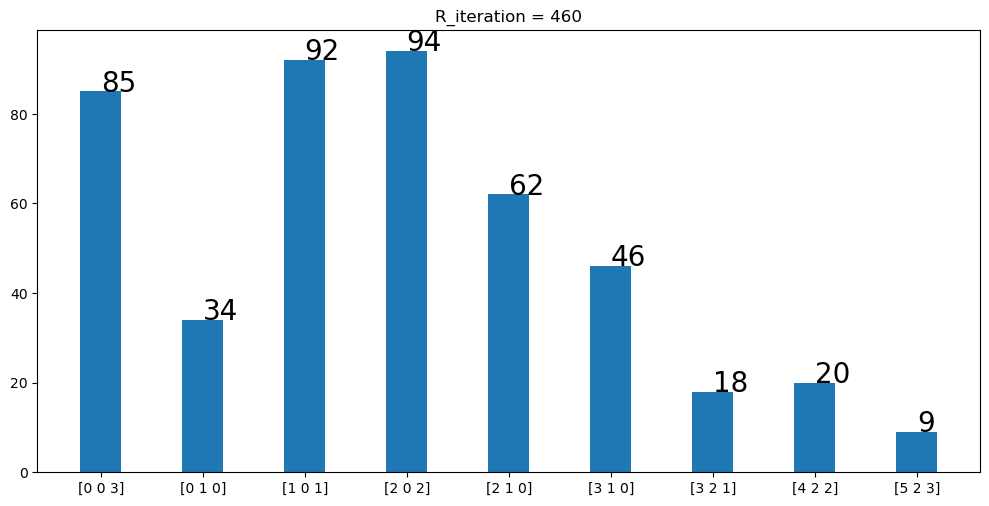

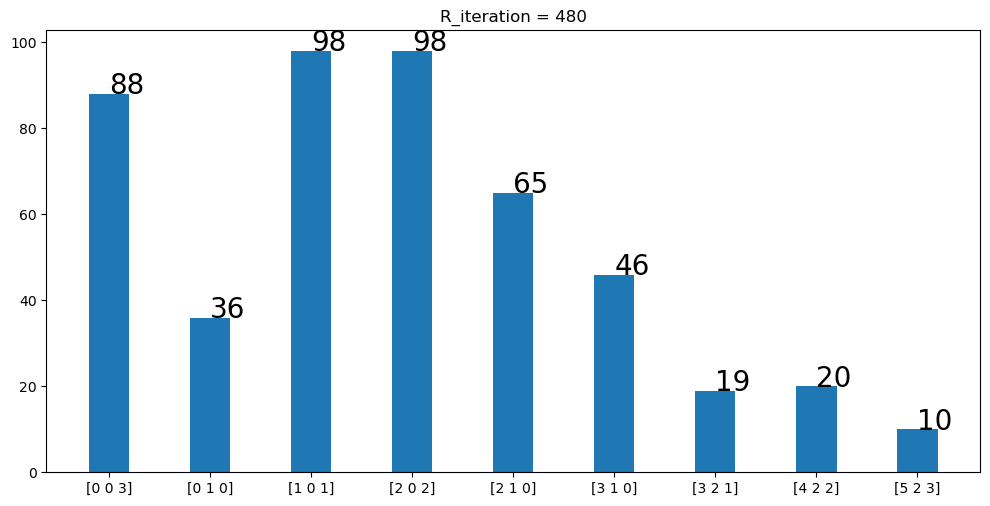

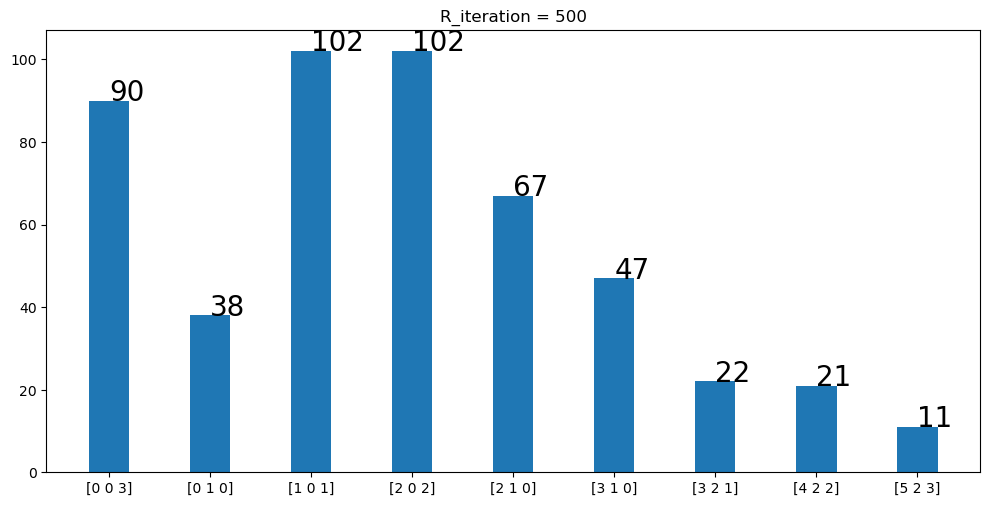

In [129]:
import matplotlib.pyplot as plt


for idx in range(len(r_beta_freq["beta"])):
    beta, cnt = r_beta_freq["beta"][idx], r_beta_freq["cnt"][idx]
    beta = [str(entry) for entry in beta]

    N = len(cnt)
    ind = np.arange(N)
    fig, ax = plt.subplots(figsize = (10,5))
    ax.bar(beta, cnt, width=0.4)

    for index,data in enumerate(cnt):
        plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=20))
    plt.tight_layout()
    
    plt.title(f"R_iteration = {(idx+1)*20}")
    
    plt.savefig(f"r_imgs/riter={idx}.png")


# y-plots

/mnt/infonas/data/nlokesh/Anaconda/anaconda3/envs/cs728/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


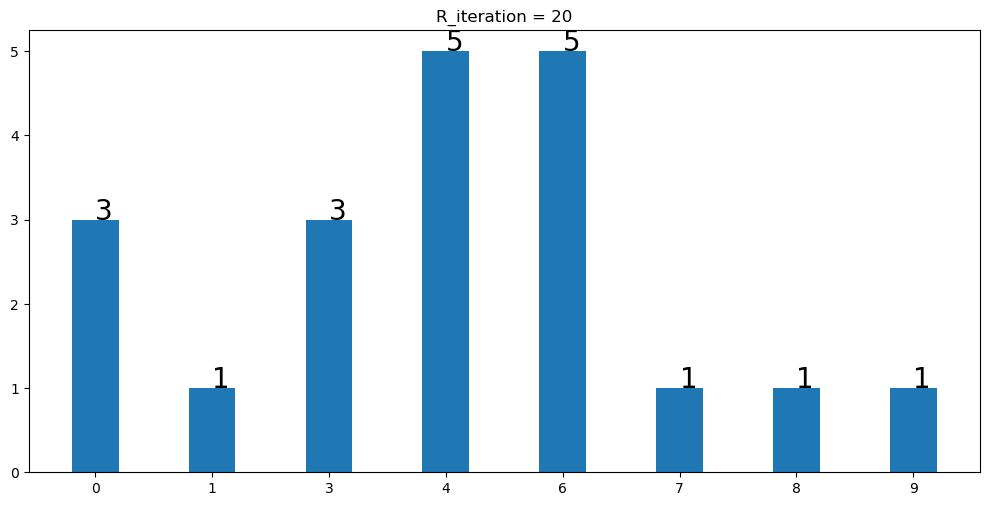

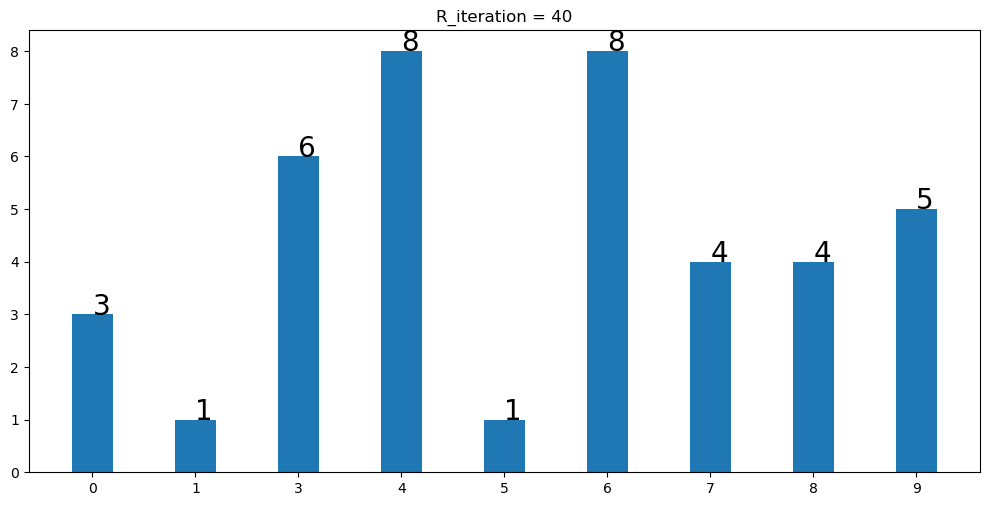

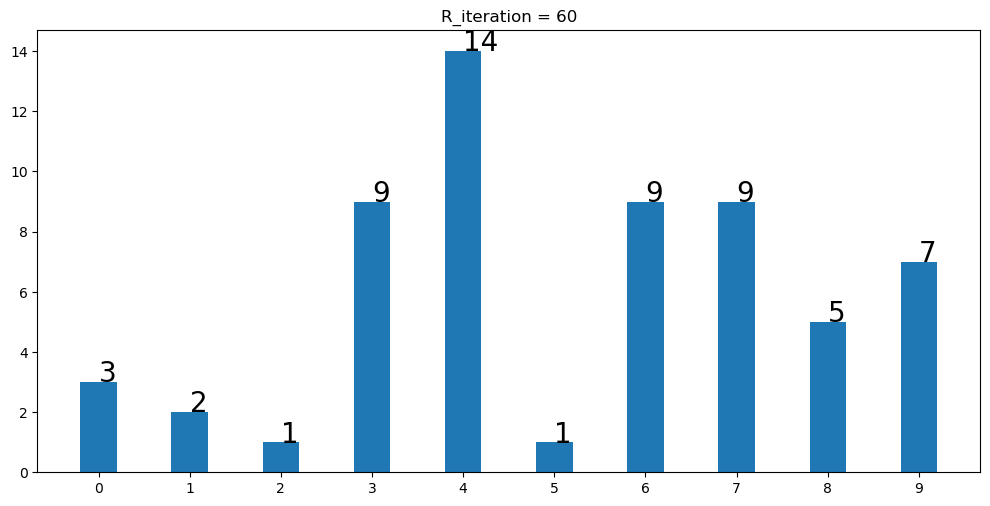

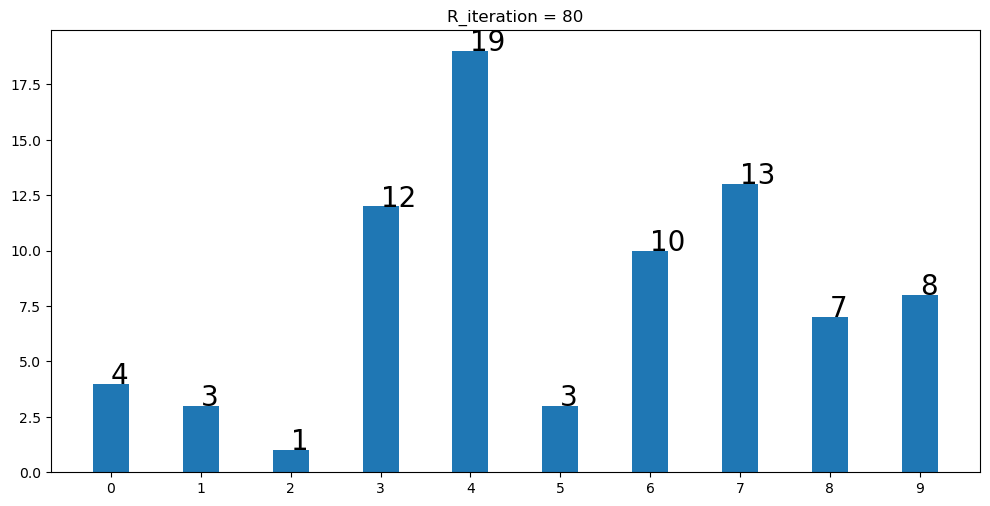

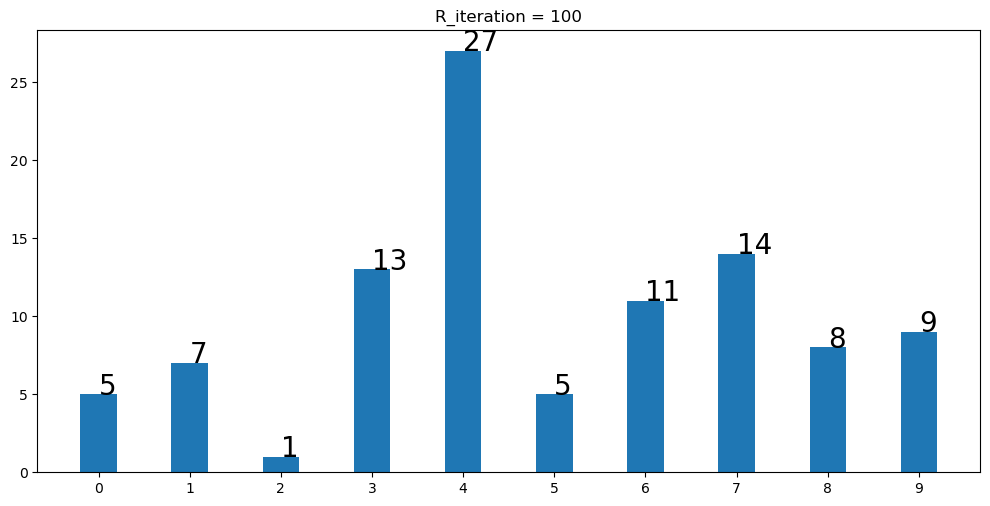

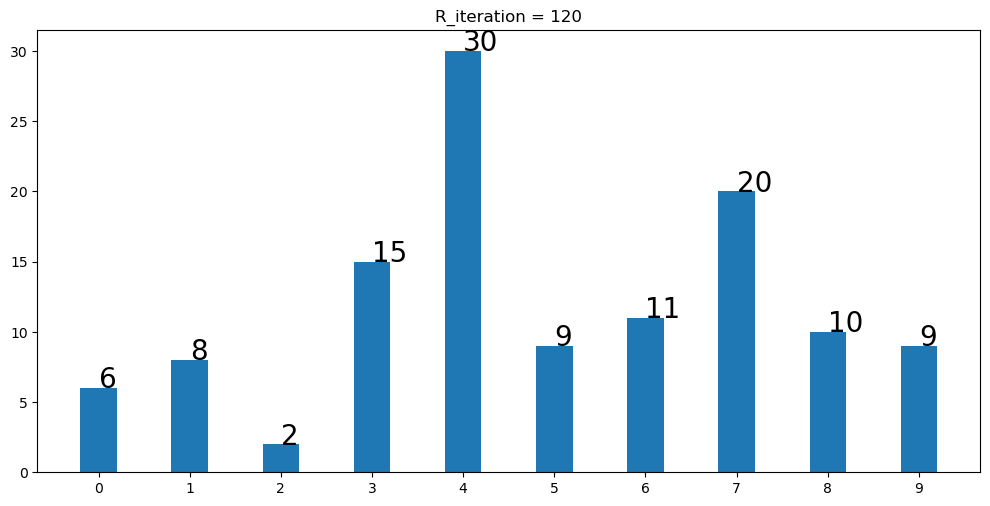

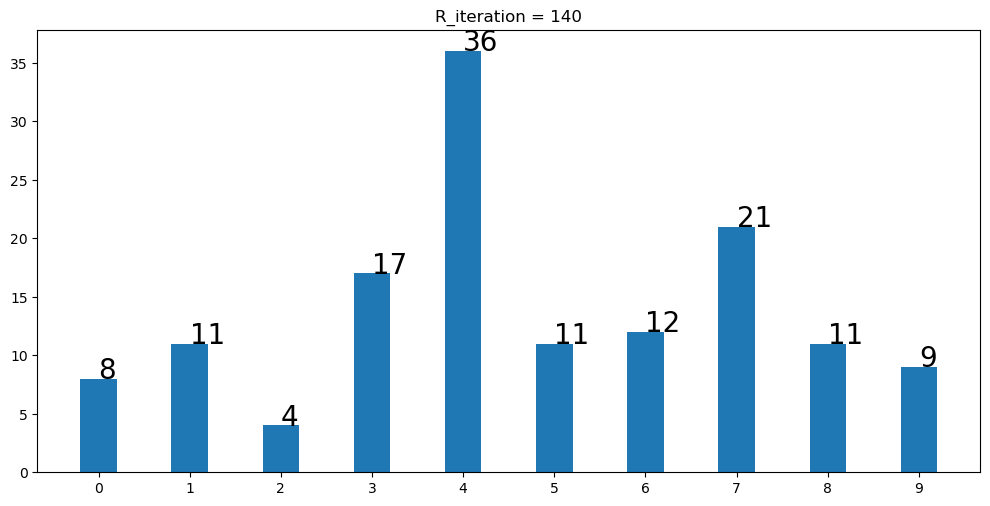

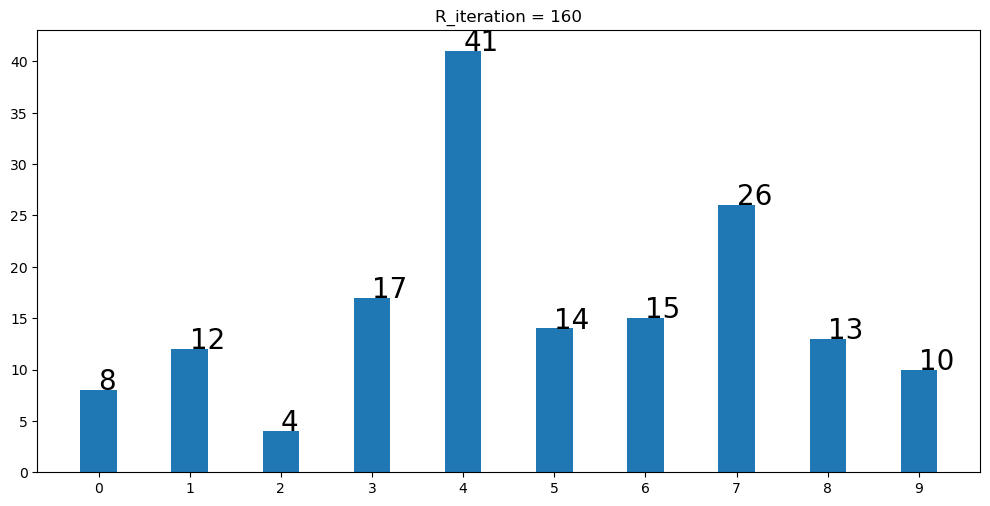

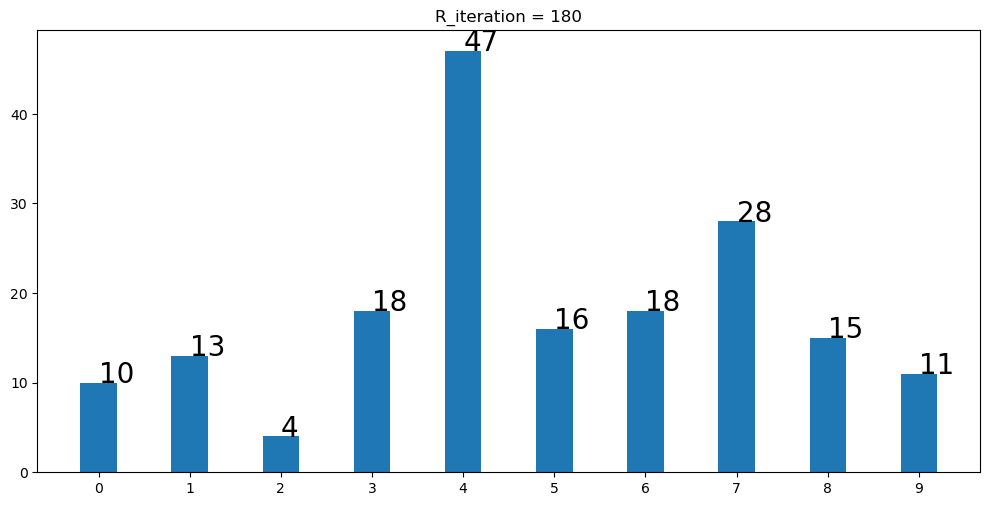

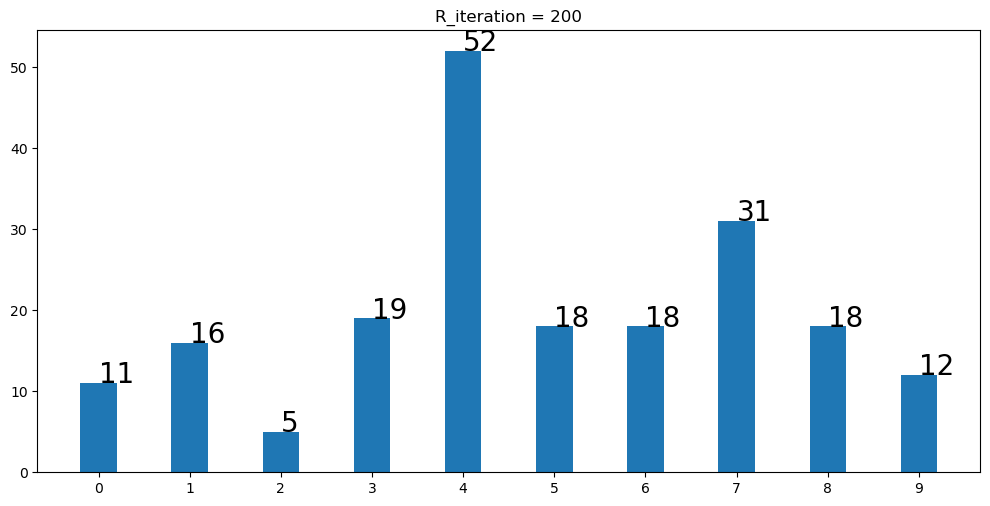

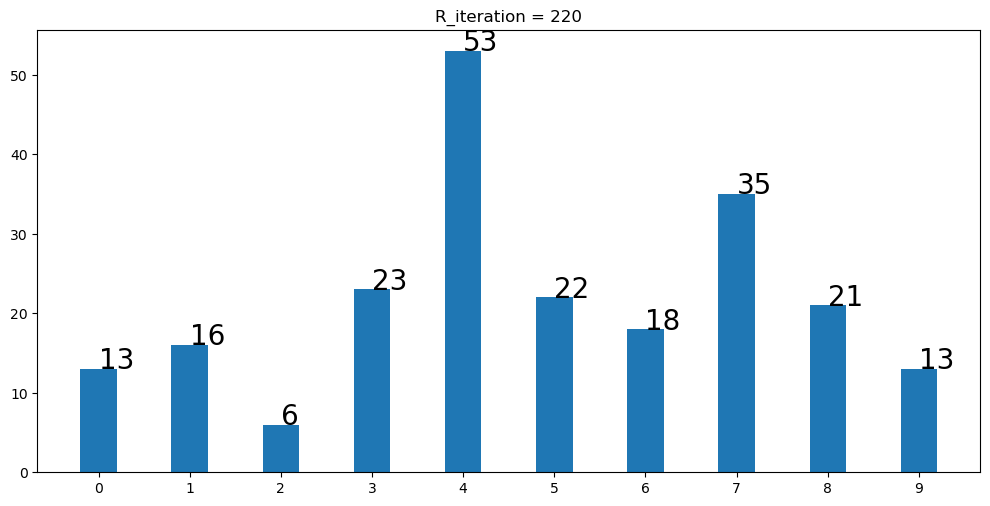

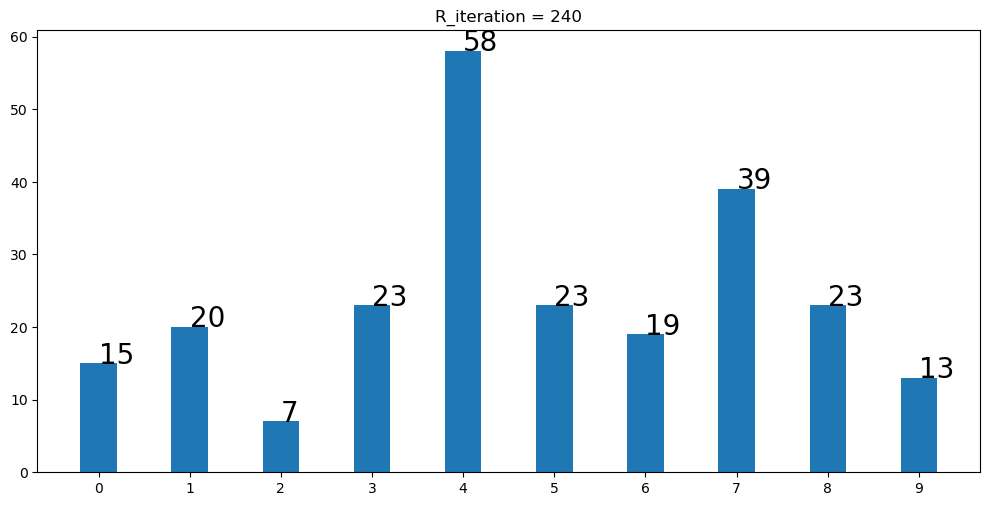

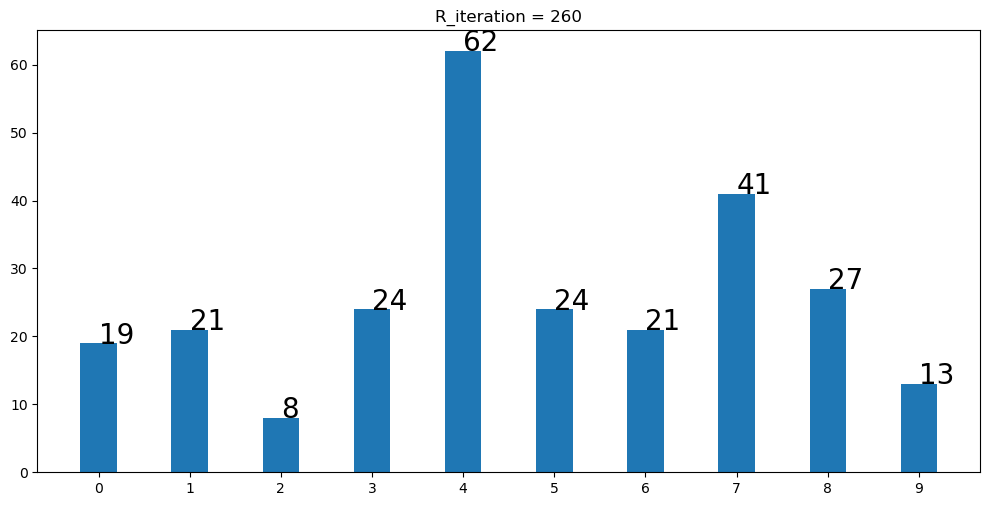

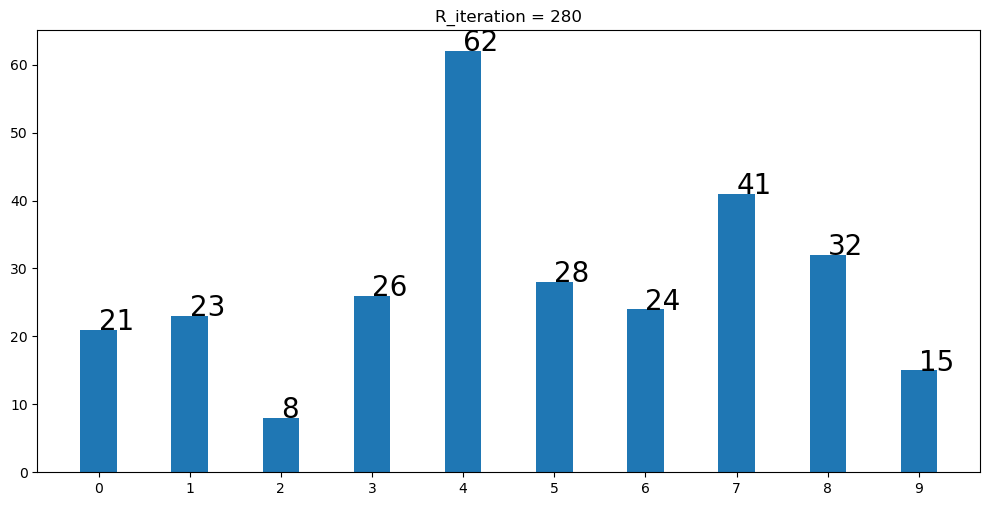

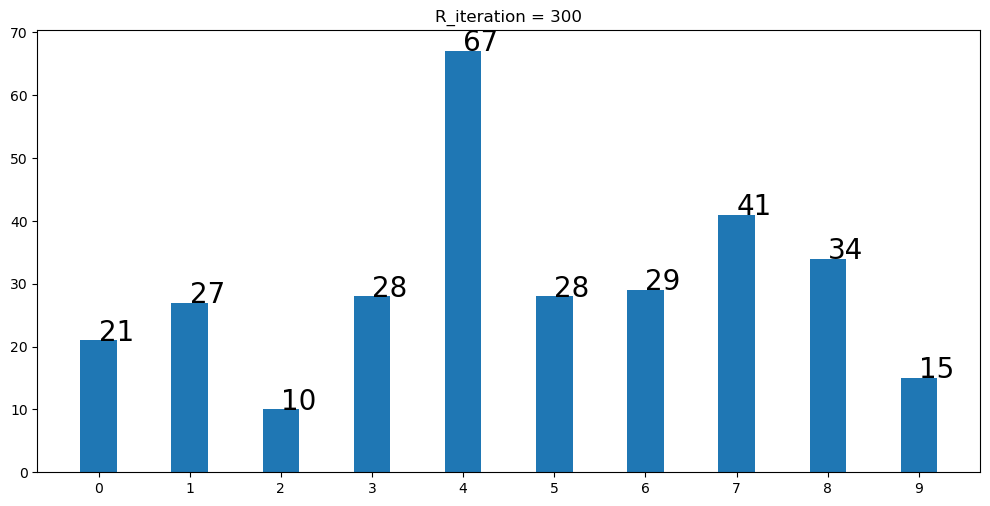

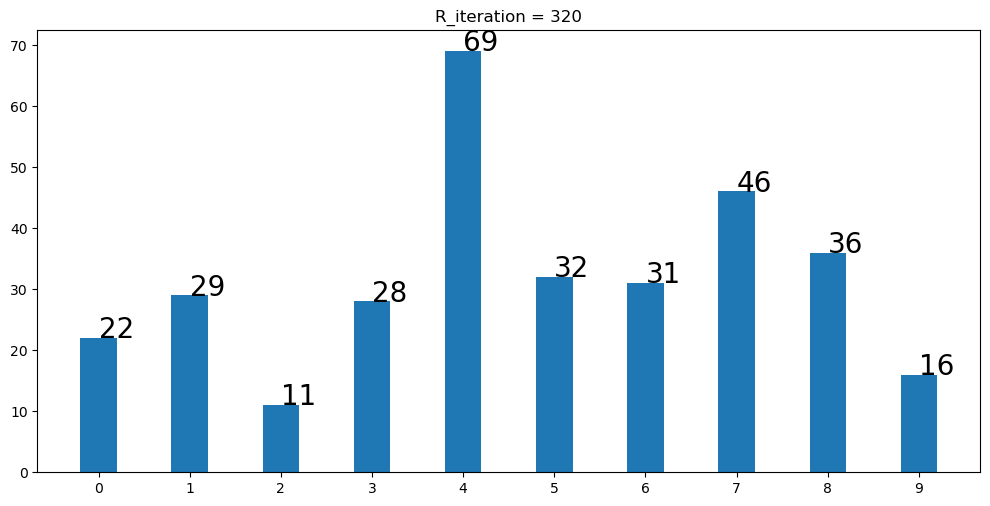

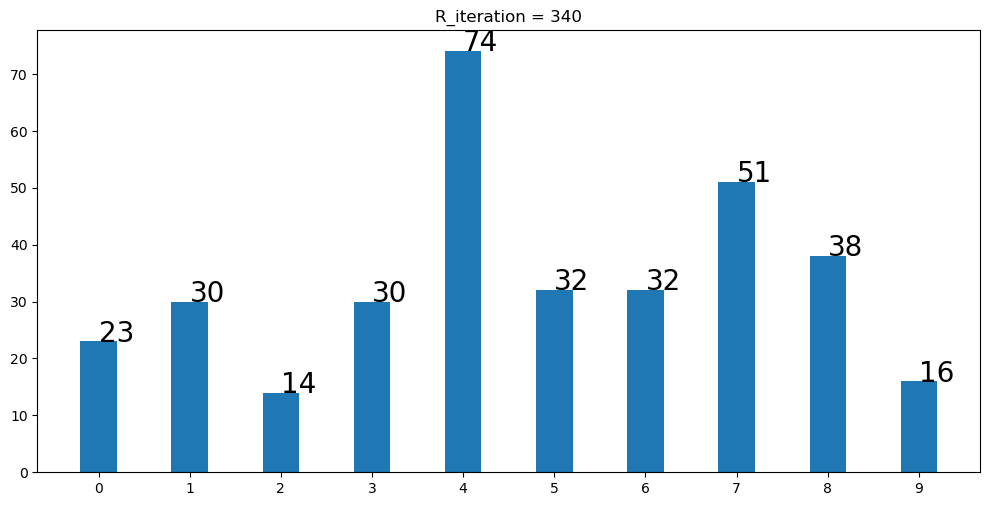

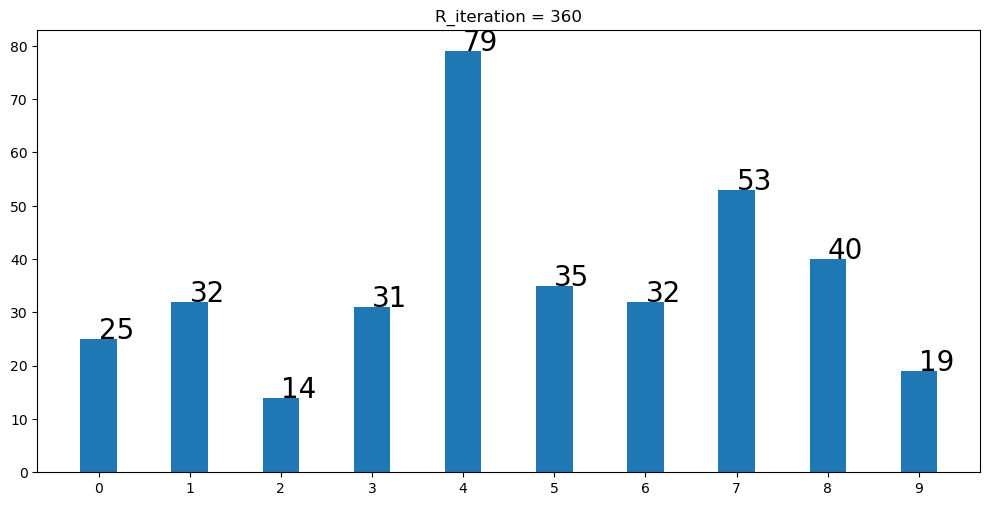

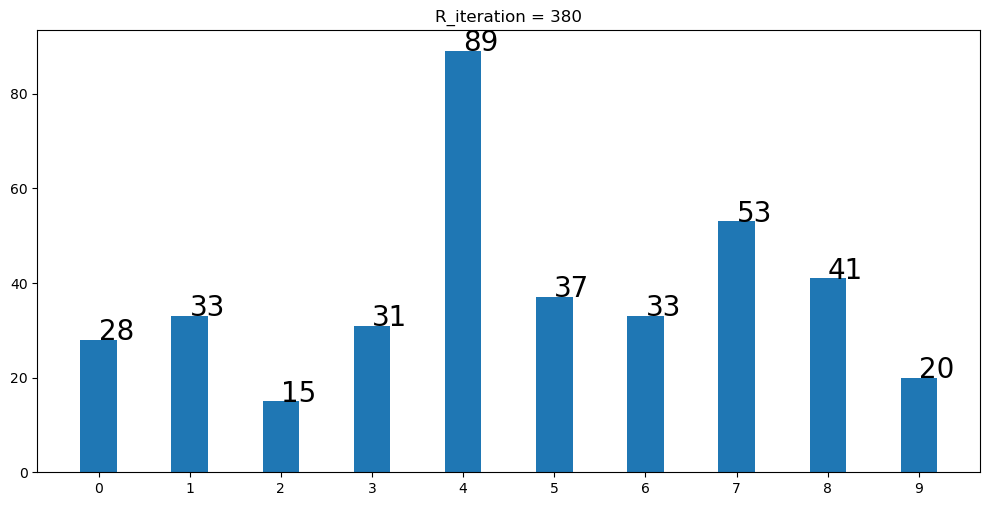

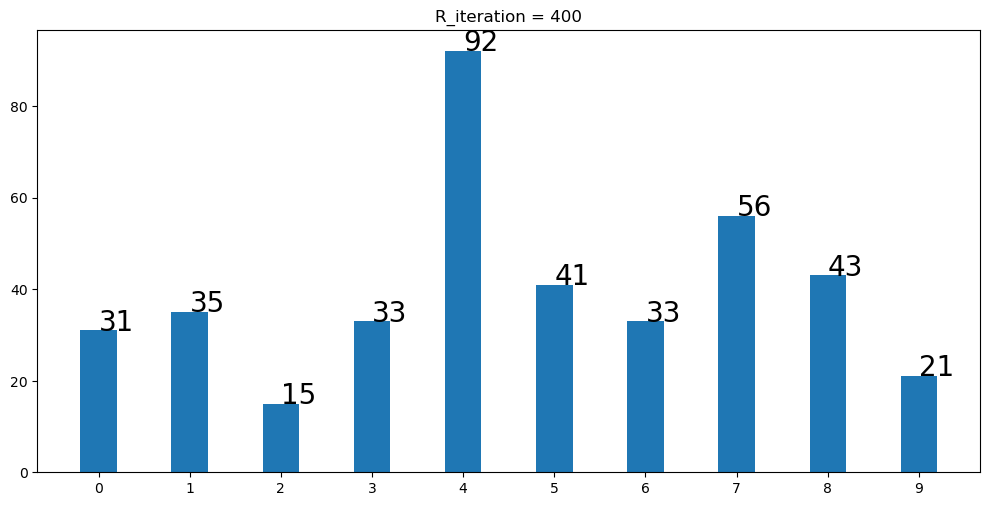

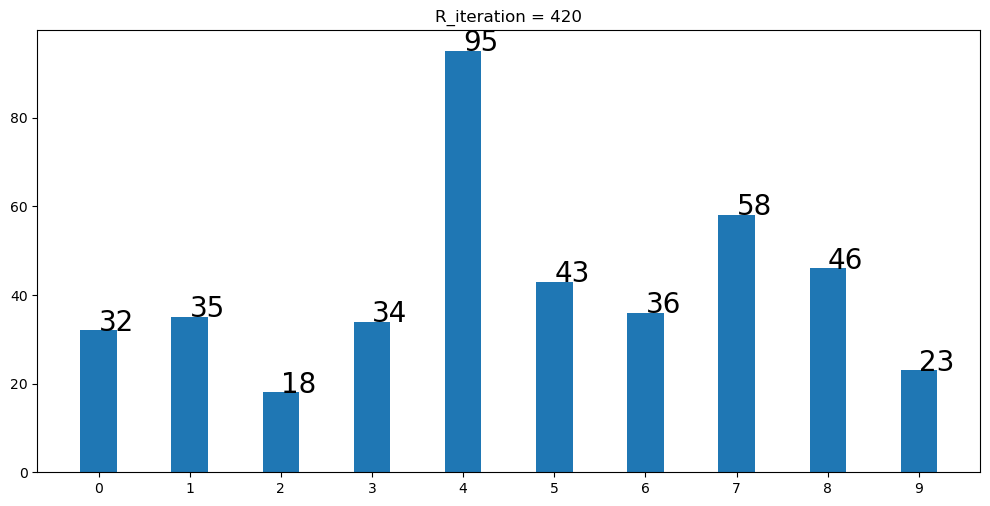

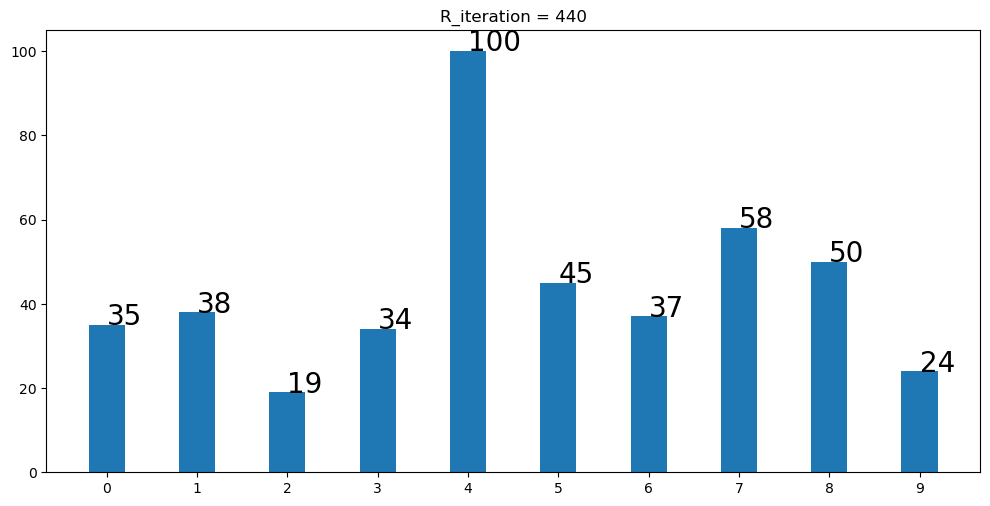

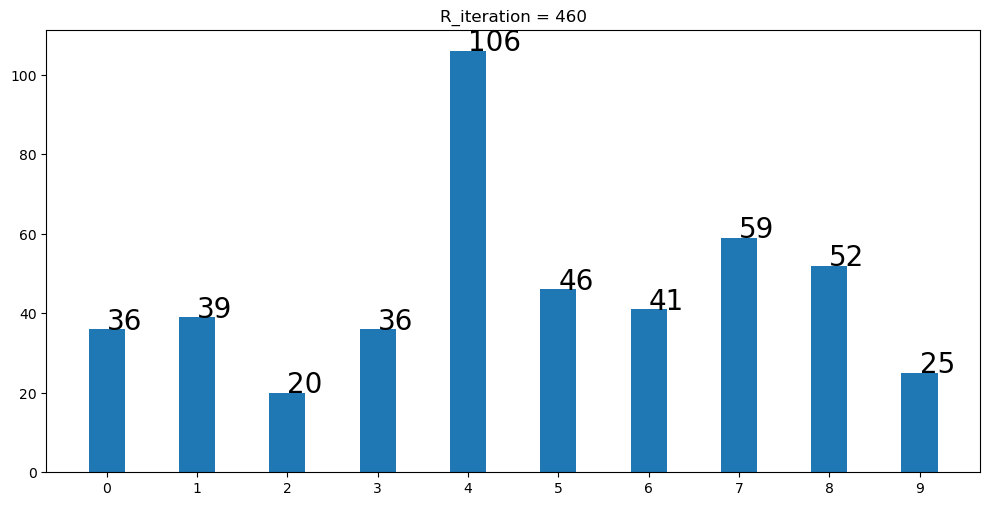

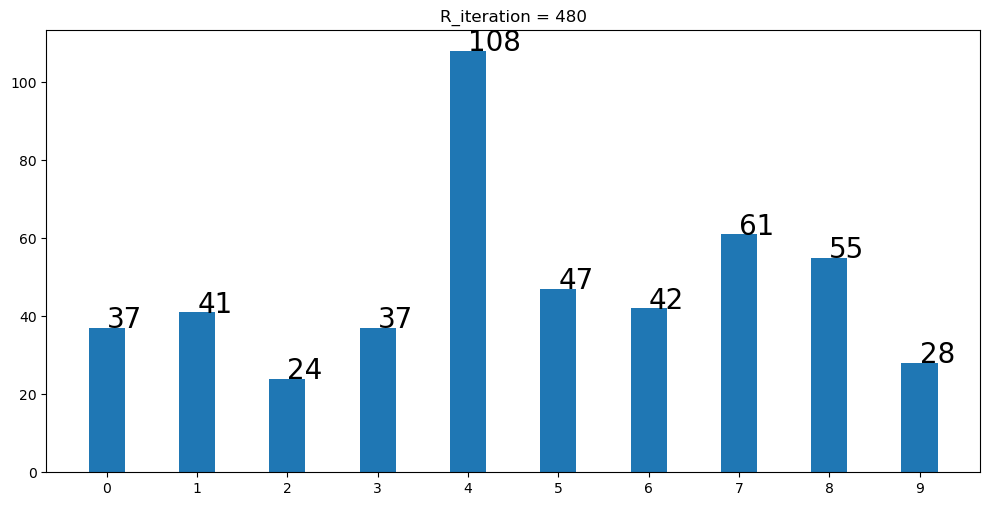

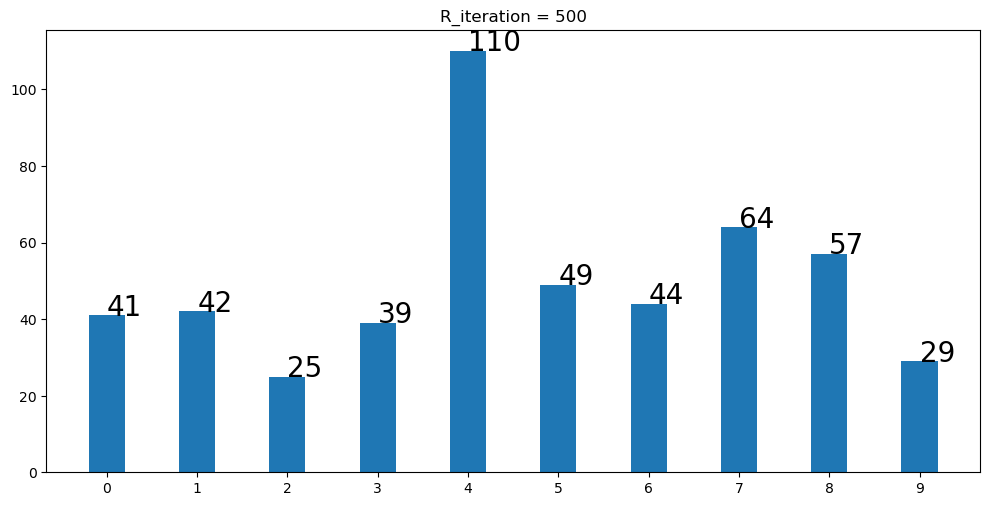

In [152]:
for idx in range(len(r_beta_freq["beta"])):
    y, cnt =  np.unique(r_beta_freq["y"][idx], return_counts=True)
    y = [str(entry) for entry in y]

    N = len(cnt)
    ind = np.arange(N)
    fig, ax = plt.subplots(figsize = (10,5))
    ax.bar(y, cnt, width=0.4)

    for index,data in enumerate(cnt):
        plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=20))
    plt.tight_layout()
    
    plt.title(f"R_iteration = {(idx+1)*20}")
    
    plt.savefig(f"r_imgs/labels_dist_riter={idx}.png")
